#### Read dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("merge_df.csv")
df.head(5)

,Unnamed: 0,File_path,Articles,Summaries
0,0,politics,Budget to set scene for election..Gordon Brown...,- Increase in the stamp duty threshold from £6...
1,1,politics,Army chiefs in regiments decision..Military ch...,"""They are very much not for the good and will ..."
2,2,politics,Howard denies split over ID cards..Michael How...,Michael Howard has denied his shadow cabinet w...
3,3,politics,Observers to monitor UK election..Ministers wi...,The report said individual registration should...
4,4,politics,Kilroy names election seat target..Ex-chat sho...,"UKIP's leader, Roger Knapman, has said he is g..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5449 non-null   int64 
 1   File_path   5449 non-null   object
 2   Articles    5449 non-null   object
 3   Summaries   5449 non-null   object
dtypes: int64(1), object(3)
memory usage: 170.4+ KB


In [ ]:
df.shape

(5449, 4)

#### Show the sum of missing values of features in the dataset

In [ ]:
df.isna().sum()

Unnamed: 0    0
File_path     0
Articles      0
Summaries     0
dtype: int64

In [ ]:
df['File_path'].unique()

array(['politics', 'sport', 'tech', 'entertainment', 'business', 'crime',
       'technology', 'art', 'science', 'health', 'architecture',
       'lifestyle', 'sports', 'law', 'accidents', 'environment '],
      dtype=object)

#### Show the distribution of target

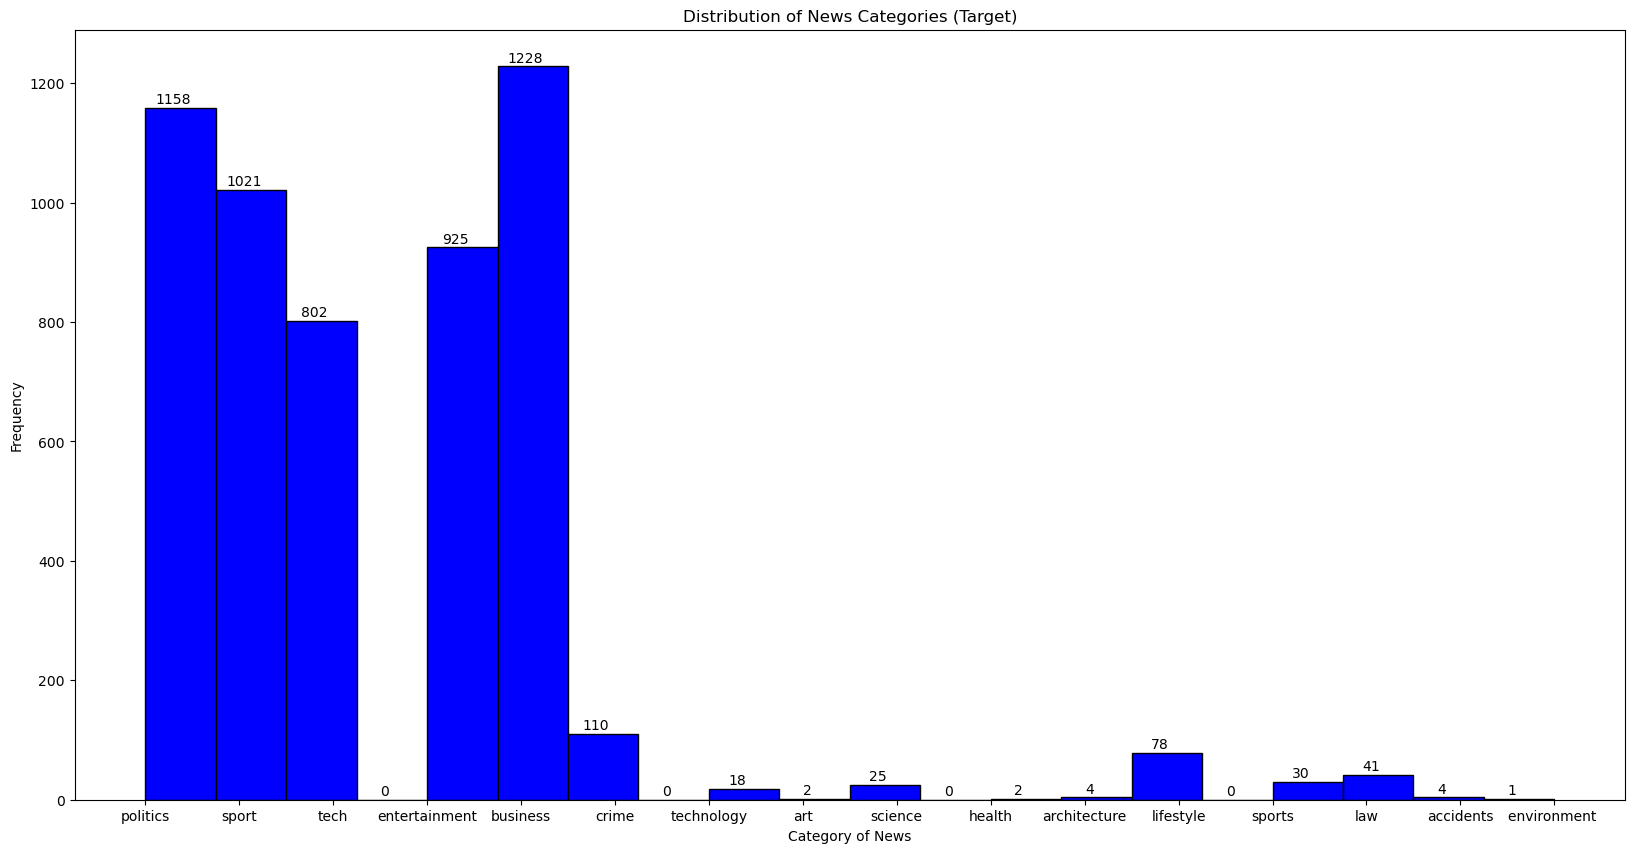

In [ ]:
distrib = pd.DataFrame(df)

fig_width =  20 # Adjust this value to increase or decrease the width
fig_height = 10

# Create a figure with the specified size
plt.figure(figsize=(fig_width, fig_height))

# Plot a histogram to show the distribution
counts, bins, patches = plt.hist(df['File_path'], bins=20, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Category of News')
plt.ylabel('Frequency')
plt.title('Distribution of News Categories (Target)')

# Display quantity on top of each bar
for count, bin_value, patch in zip(counts, bins, patches):
    height = patch.get_height()
    plt.annotate(f'{int(count)}', xy=(bin_value+0.3, height), xytext=(0,1),
                 textcoords='offset points', ha='center', va='bottom')

# Show the plot
plt.show()

#### Rename some categories (tech to technology and sport to sports)

In [ ]:
# Define a dictionary to map old values to new values
value_mapping = {'sport': 'sports', 'tech': 'technology'}

# Replace values in the DataFrame using the replace method
df = df.replace(value_mapping)

In [ ]:
df['File_path'].unique()

array(['politics', 'sports', 'technology', 'entertainment', 'business',
       'crime', 'art', 'science', 'health', 'architecture', 'lifestyle',
       'law', 'accidents', 'environment '], dtype=object)

#### Drop id and summaries

In [ ]:
copied_df = df.copy()

#drop id column
df2 = df.iloc[: , 0:]
copied_df.drop(columns=df2.columns[0], axis=1,  inplace=True)

#drop last column
copied_df.drop(columns=df2.columns[3], axis=1,inplace=True)

copied_df.rename(columns = {'File_path':'category'}, inplace = True)
copied_df.rename(columns = {'Articles':'article'}, inplace = True)

copied_df.head(5)


,category,article
0,politics,Budget to set scene for election..Gordon Brown...
1,politics,Army chiefs in regiments decision..Military ch...
2,politics,Howard denies split over ID cards..Michael How...
3,politics,Observers to monitor UK election..Ministers wi...
4,politics,Kilroy names election seat target..Ex-chat sho...


#### One hot encode the categories

In [ ]:
# Create a sample DataFrame
cop_df = copied_df.copy()

# Display the DataFrame before replacement
print("\nDataFrame before replacement:")
print(cop_df.head(5))
print(cop_df.tail(5))

# Create a dictionary for replacement: 'politics': 0, 'sports': 2, 'business': 1, 'other': 3
replacement_dict = {'politics': 0, 'sports': 2,'business': 1, 'entertainment': 3, 'crime': 3,
       'technology': 3, 'art': 3, 'science': 3, 'health': 3, 'architecture': 3,
       'lifestyle' : 3, 'law': 3, 'accidents': 3, 'environment ': 3}

# Replace labels using the dictionary
cop_df['category'].replace(replacement_dict, inplace=True)

# Display the DataFrame after replacement
print("\nDataFrame after replacement:")
print(cop_df.head(5))
print(cop_df.tail(5))



DataFrame before replacement:
   category                                            article
0  politics  Budget to set scene for election..Gordon Brown...
1  politics  Army chiefs in regiments decision..Military ch...
2  politics  Howard denies split over ID cards..Michael How...
3  politics  Observers to monitor UK election..Ministers wi...
4  politics  Kilroy names election seat target..Ex-chat sho...
       category                                            article
5444  accidents  HONG KONG  —   Hundreds of pilot whales that s...
5445     sports  NICE, France  —     Rivère accepts the complim...
5446   business  FRANKFURT  —   Germans who never really warmed...
5447     sports  Charles Oakley has strong feelings about compe...
5448  lifestyle  Hans Rosling, a Swedish doctor who transformed...

DataFrame after replacement:
   category                                            article
0         0  Budget to set scene for election..Gordon Brown...
1         0  Army chiefs in regim

In [ ]:
cop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5449 non-null   int64 
 1   article   5449 non-null   object
dtypes: int64(1), object(1)
memory usage: 85.3+ KB


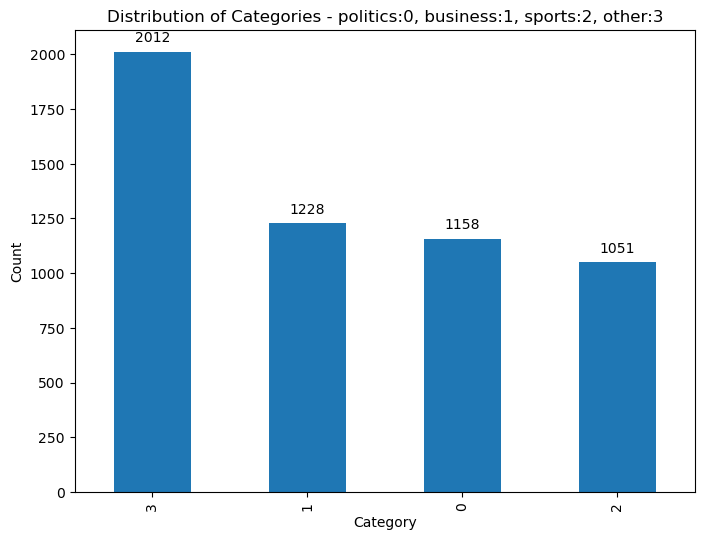

In [ ]:
category_counts = cop_df['category'].value_counts()

# Create a bar plot for the distribution of categories
ax = category_counts.plot(kind='bar', figsize=(8, 6))

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories - politics:0, business:1, sports:2, other:3')

# Show the plot
plt.show()

#### Clean the data (article)

In [ ]:
import re
# function to make lower case
def to_lowercase(text):
    return text.str.lower()
#remove extra whitespaces and tabs
def remove_extra_whitespace_tabs(text):
    pattern = r'^\s+|\s+$'
    return text.str.replace(pattern, '')

# Function to remove special characters (keeping full stops)
def remove_special_characters(text):
    special_characters_pattern = r'[^a-zA-Z0-9\s]'
    text_without_special_chars = text.str.replace(special_characters_pattern, '')
    return text_without_special_chars

# Function to remove specific characters
def remove_specific_characters(text):
    # regular expression pattern for the characters to remove
    pattern = r'\.{2,}|[—!&$%^`\"_+=~:?;,\/-]+|\n|\t'

    # replace matches with an empty string
    cleaned_text = text.apply(lambda x: re.sub(pattern, ' ', x))

    # Remove extra white spaces
    cleaned_text = cleaned_text.apply(lambda x: ' '.join(x.split()))
    return cleaned_text

In [ ]:
# Convert all columns to strings
cop_df['article'] = cop_df['article'].apply(str)

In [ ]:
cop_df['article'] = to_lowercase(cop_df['article'])
cop_df['article']

0       budget to set scene for election gordon brown ...
1       army chiefs in regiments decision military chi...
2       howard denies split over id cards michael howa...
3       observers to monitor uk election ministers wil...
4       kilroy names election seat target ex chat show...
                              ...                        
5444    hong kong hundreds of pilot whales that swam i...
5445    nice france rivère accepts the compliment but ...
5446    frankfurt germans who never really warmed up t...
5447    charles oakley has strong feelings about compe...
5448    hans rosling a swedish doctor who transformed ...
Name: article, Length: 5449, dtype: object

In [ ]:
# remove extra white space and tabs
cop_df['article'] = remove_extra_whitespace_tabs(cop_df['article'])
cop_df['article']

0       budget to set scene for election gordon brown ...
1       army chiefs in regiments decision military chi...
2       howard denies split over id cards michael howa...
3       observers to monitor uk election ministers wil...
4       kilroy names election seat target ex chat show...
                              ...                        
5444    hong kong hundreds of pilot whales that swam i...
5445    nice france rivère accepts the compliment but ...
5446    frankfurt germans who never really warmed up t...
5447    charles oakley has strong feelings about compe...
5448    hans rosling a swedish doctor who transformed ...
Name: article, Length: 5449, dtype: object

In [ ]:
# remove special characters
cop_df['article'] = remove_special_characters(cop_df['article'])
cop_df['article']


0       budget to set scene for election gordon brown ...
1       army chiefs in regiments decision military chi...
2       howard denies split over id cards michael howa...
3       observers to monitor uk election ministers wil...
4       kilroy names election seat target ex chat show...
                              ...                        
5444    hong kong hundreds of pilot whales that swam i...
5445    nice france rivère accepts the compliment but ...
5446    frankfurt germans who never really warmed up t...
5447    charles oakley has strong feelings about compe...
5448    hans rosling a swedish doctor who transformed ...
Name: article, Length: 5449, dtype: object

In [ ]:
cop_df['article'] = remove_specific_characters(cop_df['article'])
cop_df['article']

0       budget to set scene for election gordon brown ...
1       army chiefs in regiments decision military chi...
2       howard denies split over id cards michael howa...
3       observers to monitor uk election ministers wil...
4       kilroy names election seat target ex chat show...
                              ...                        
5444    hong kong hundreds of pilot whales that swam i...
5445    nice france rivère accepts the compliment but ...
5446    frankfurt germans who never really warmed up t...
5447    charles oakley has strong feelings about compe...
5448    hans rosling a swedish doctor who transformed ...
Name: article, Length: 5449, dtype: object

In [ ]:
cop_df.to_csv('output.csv', index=False, encoding='utf-8-sig')

### Embed the data using Word2Vec

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer

In [ ]:
articles = cop_df.article
categories = cop_df.category

In [ ]:
# Combine articles and categories into TaggedDocument format
tagged_data = [TaggedDocument(words=article.split(), tags=[str(cat)]) for article, cat in zip(articles, categories)]

# Train a Doc2Vec model
model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Embed articles using the trained model without converting to lowercase
embedded_articles = np.array([model.infer_vector(article.split()) for article in articles])

In [ ]:
embedded_articles

array([[-2.8529806 ,  1.7001022 , -1.7777231 , ...,  1.5725424 ,
         2.9040523 ,  1.5978631 ],
       [-4.0622363 ,  1.4120576 , -0.9887474 , ...,  0.22413415,
         3.1321135 ,  1.3012943 ],
       [-3.8225904 ,  0.76634055, -1.9039583 , ...,  0.35767636,
         3.5568821 ,  1.3496279 ],
       ...,
       [-4.1450963 ,  0.13428602,  0.7995579 , ...,  0.67217636,
         2.736376  ,  1.6082772 ],
       [-5.9914527 ,  2.1975648 , -0.3275752 , ..., -1.3911645 ,
         4.9919147 ,  2.4273758 ],
       [-3.9488707 ,  0.785351  ,  0.29112825, ..., -0.8308689 ,
        -0.5855955 ,  0.25483015]], dtype=float32)

#### Using RandomOverSampler to handle the imbalanced data

In [ ]:
#!pip install imbalanced-learn
#!pip install --upgrade scikit-learn
#!pip install --upgrade imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Assuming X and y are defined
X = embedded_articles  # Assuming this is your feature matrix
y = cop_df['category']  # Assuming this is your target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the RandomOverSampler instance
ros = RandomOverSampler(random_state=42)

# Fit and transform the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

#### Training with NN